# Preparing Time Series from Wide-Form Data

DataSet: https://www.zillow.com/research/data/

## Imports/Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import os

## Functions

In [25]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

## Zillow DataSet

In [5]:
df = pd.read_csv('Data/Zillow.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


# Part 1: 

## Data Exploration

In [7]:
#Identify Columns
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [10]:
#Filter only the top 4 ranked by sizerank
rank = df['SizeRank'] < 4

df = df[rank]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the Data to LongForm

In [11]:
#Identify featues vs timedata
features = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'Metro', 'CountyName']

In [14]:
#Melt to long form
melted_df = pd.melt(df,id_vars=features)
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [15]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   variable    1092 non-null   object 
 9   value       1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [17]:
melted_df = melted_df.rename(columns = {'variable':'date', 'value':'House Value'})

In [20]:
melted_df['date'] = pd.to_datetime(melted_df['date'])
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     1092 non-null   int64         
 1   SizeRank     1092 non-null   int64         
 2   RegionName   1092 non-null   object        
 3   RegionType   1092 non-null   object        
 4   StateName    1092 non-null   object        
 5   State        1092 non-null   object        
 6   Metro        1092 non-null   object        
 7   CountyName   1092 non-null   object        
 8   date         1092 non-null   datetime64[ns]
 9   House Value  1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [21]:
melted_df = melted_df.set_index('date')
melted_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,House Value
date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [22]:
#Index info
melted_df.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='date', length=1092, freq=None)

In [24]:
new_df = melted_df.groupby('RegionName').resample('MS').sum(numeric_only=True).copy()
new_df

RegionID  SizeRank  House Value
RegionName date                                       
Chicago    2000-01-01     17426         3     166139.0
           2000-02-01     17426         3     166536.0
           2000-03-01     17426         3     167368.0
           2000-04-01     17426         3     168826.0
           2000-05-01     17426         3     170499.0
...                         ...       ...          ...
New York   2022-05-01      6181         0     768797.0
           2022-06-01      6181         0     773944.0
           2022-07-01      6181         0     777692.0
           2022-08-01      6181         0     779960.0
           2022-09-01      6181         0     781622.0

[1092 rows x 3 columns]

# Part 2

In [26]:
unstacked = new_df.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2000-01-01    17426   39051       12447     6181        3       2           1   
2000-02-01    17426   39051       12447     6181        3       2           1   
2000-03-01    17426   39051       12447     6181        3       2           1   
2000-04-01    17426   39051       12447     6181        3       2           1   
2000-05-01    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-01    17426   39051       12447     6181        3       2           1   
2022-06-01    17426   39051       12447     6181        3       2           1   
2022-07-01    17426   39051       12447     6181        3       2           1   
2022-08-01    17426   39051       12447     6181        3       2           1   
2022-09-01    17426   39051       12447     6181        3       2           1   

                    House Value                                  
RegionName New York     Chicago   Houston Los Angeles  New York  
date                                                             
2000-01-01        0    166139.0  109068.0    234181.0  253690.0  
2000-02-01        0    166536.0  109079.0    234401.0  255517.0  
2000-03-01        0    167368.0  108878.0    235513.0  257207.0  
2000-04-01        0    168826.0  108881.0    237589.0  260310.0  
2000-05-01        0    170499.0  108834.0    240113.0  263204.0  
...             ...         ...       ...         ...       ...  
2022-05-01        0    312487.0  265558.0    990391.0  768797.0  
2022-06-01        0    314663.0  268901.0    992337.0  773944.0  
2022-07-01        0    315910.0  271059.0    992630.0  777692.0  
2022-08-01        0    315587.0  272400.0    978196.0  779960.0  
2022-09-01        0    315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

In [28]:
unstacked.columns

MultiIndex([(   'RegionID',     'Chicago'),
            (   'RegionID',     'Houston'),
            (   'RegionID', 'Los Angeles'),
            (   'RegionID',    'New York'),
            (   'SizeRank',     'Chicago'),
            (   'SizeRank',     'Houston'),
            (   'SizeRank', 'Los Angeles'),
            (   'SizeRank',    'New York'),
            ('House Value',     'Chicago'),
            ('House Value',     'Houston'),
            ('House Value', 'Los Angeles'),
            ('House Value',    'New York')],
           names=[None, 'RegionName'])

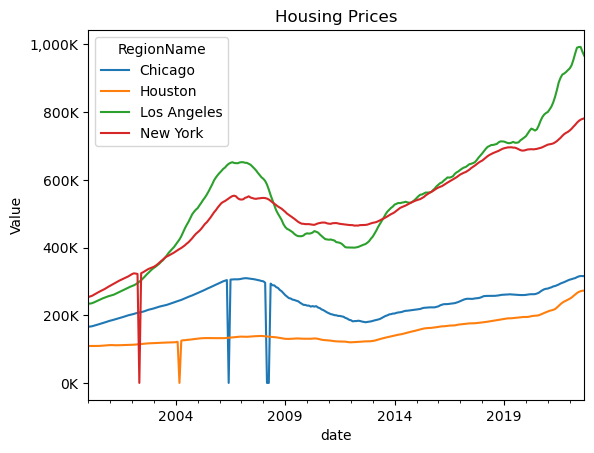

In [31]:
ax = unstacked['House Value'].plot()
ax.set_title('Housing Prices')
ax.set_ylabel('Value')
ax.yaxis.set_major_formatter(fmt_thous)

## Q1: 
Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [32]:
unstacked.loc[pd.IndexSlice['2008'],:]

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2008-01-01    17426   39051       12447     6181        3       2           1   
2008-02-01    17426   39051       12447     6181        3       2           1   
2008-03-01    17426   39051       12447     6181        3       2           1   
2008-04-01    17426   39051       12447     6181        3       2           1   
2008-05-01    17426   39051       12447     6181        3       2           1   
2008-06-01    17426   39051       12447     6181        3       2           1   
2008-07-01    17426   39051       12447     6181        3       2           1   
2008-08-01    17426   39051       12447     6181        3       2           1   
2008-09-01    17426   39051       12447     6181        3       2           1   
2008-10-01    17426   39051       12447     6181        3       2           1   
2008-11-01    17426   39051       12447     6181        3       2           1   
2008-12-01    17426   39051       12447     6181        3       2           1   

                    House Value                                  
RegionName New York     Chicago   Houston Los Angeles  New York  
date                                                             
2008-01-01        0    300207.0  138208.0    603029.0  546538.0  
2008-02-01        0    296063.0  137512.0    596635.0  546098.0  
2008-03-01        0         0.0  136795.0    586065.0  544562.0  
2008-04-01        0         0.0  136628.0    571226.0  541865.0  
2008-05-01        0    293467.0  136228.0    554589.0  537685.0  
2008-06-01        0    288495.0  135773.0    539622.0  533810.0  
2008-07-01        0    288174.0  135392.0    524220.0  529211.0  
2008-08-01        0    283199.0  134770.0    510520.0  525290.0  
2008-09-01        0    280695.0  133932.0    500124.0  521347.0  
2008-10-01        0    274849.0  133189.0    490979.0  518048.0  
2008-11-01        0    271059.0  132247.0    481905.0  514767.0  
2008-12-01        0    265306.0  131283.0    469294.0  510309.0

### Answer:
Highest = New York
Lowest = Houston

## Q2
How much did the home values change from November 2008 to December 2008 (in dollars)?

In [34]:
q2 = unstacked.diff()
q2

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2000-01-01      NaN     NaN         NaN      NaN      NaN     NaN         NaN   
2000-02-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2000-03-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2000-04-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2000-05-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-06-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-07-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-08-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-09-01      0.0     0.0         0.0      0.0      0.0     0.0         0.0   

                    House Value                               
RegionName New York     Chicago Houston Los Angeles New York  
date                                                          
2000-01-01      NaN         NaN     NaN         NaN      NaN  
2000-02-01      0.0       397.0    11.0       220.0   1827.0  
2000-03-01      0.0       832.0  -201.0      1112.0   1690.0  
2000-04-01      0.0      1458.0     3.0      2076.0   3103.0  
2000-05-01      0.0      1673.0   -47.0      2524.0   2894.0  
...             ...         ...     ...         ...      ...  
2022-05-01      0.0      2838.0  4457.0     17223.0   6476.0  
2022-06-01      0.0      2176.0  3343.0      1946.0   5147.0  
2022-07-01      0.0      1247.0  2158.0       293.0   3748.0  
2022-08-01      0.0      -323.0  1341.0    -14434.0   2268.0  
2022-09-01      0.0      -158.0   239.0    -11601.0   1662.0  

[273 rows x 12 columns]

In [36]:
q2.loc[pd.IndexSlice['12/01/2008'],:]

             RegionName 
RegionID     Chicago            0.0
             Houston            0.0
             Los Angeles        0.0
             New York           0.0
SizeRank     Chicago            0.0
             Houston            0.0
             Los Angeles        0.0
             New York           0.0
House Value  Chicago        -5753.0
             Houston         -964.0
             Los Angeles   -12611.0
             New York       -4458.0
Name: 2008-12-01 00:00:00, dtype: float64

### Answer:
Chicago        -5753.0

Houston         -964.0

Los Angeles   -12611.0

New York       -4458.0